In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [2]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'deptht'})
area = meshmask.e1t[0] * meshmask.e2t[0]

In [3]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')

In [4]:
outfall_may_01 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/01may21/SalishSea_1h_20210501_20210501_grid_T.nc')
outfall_may_03 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/03may21/SalishSea_1h_20210503_20210503_grid_T.nc')
outfall_may_06 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/06may21/SalishSea_1h_20210506_20210506_grid_T.nc')
outfall_may_16 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/16may21/SalishSea_1h_20210516_20210516_grid_T.nc')
outfall_may_31 = xr.open_dataset('/data/sallen/results/MEOPAR/wastewater/alkalinity/31may21/SalishSea_1h_20210531_20210531_grid_T.nc')
outfall_may_31

<xarray.Dataset>
Dimensions:               (y: 898, x: 398, nvertex: 4, deptht: 40,
                           axis_nbounds: 2, time_counter: 24)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5 1.5 2.5 3.5 ... 387.6 414.5 441.5
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2021-05-31T00:30:00 ....
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables:
    bounds_nav_lon        (y, x, nvertex) float32 ...
    bounds_nav_lat        (y, x, nvertex) float32 ...
    area                  (y, x) float32 ...
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    sossheig              (time_counter, y, x) float32 ...
    votemper              (time_counter, deptht, y, x) float32 ...
    vosaline              (time_counter, deptht, y, x) float32 ...
    sigma_theta           (time_counter, deptht, y, x) float32 ...
    e3t                   (time_counter, deptht, y, x) float32 ...
    outfall               (time_counter, deptht, y, x) float32 ...
Attributes:
    name:         SalishSea_1h_20210501_20210531_grid_T
    description:  physics tracers and VVL layer thicknesses
    title:        physics tracers and VVL layer thicknesses
    Conventions:  CF-1.6
    timeStamp:    2023-Dec-04 08:16:02 GMT
    uuid:         8001ac62-db43-40ed-adbf-a77eef55c582

In [5]:
def planview(base, field, it, ide, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  
    data = base[field][it, ide, 400+iz:500-iz, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.y, data.values, cmap=cmap, norm = norm_data)
    pc.set_array(data.values.ravel()) 
    axs.contour(data.x, data.y, data.values, levels=[contour_value], colors='green')
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    axs.set_xlabel('x')
    axs.set_ylabel('y')
    axs.set_title(f'May01-2021 {field} at Depth 45m')
    axs.scatter(304 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(304 - 270, 447 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 446 - 420, marker = 'x', color = 'yellow')
    axs.scatter(305 - 270, 447 - 420, marker = 'x', color = 'yellow')

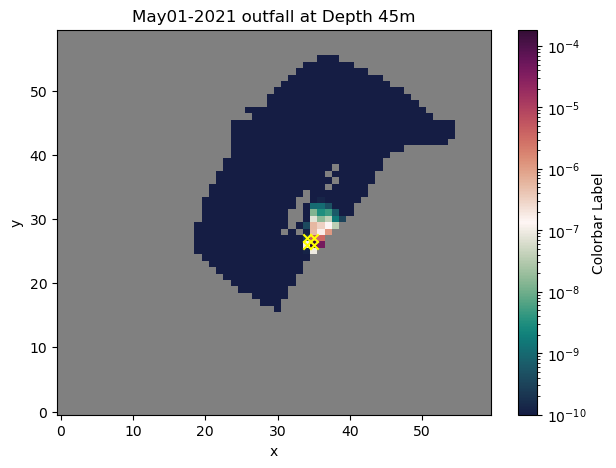

In [10]:
planview(outfall_may_01, 'outfall', 2, 23, cm_vel)

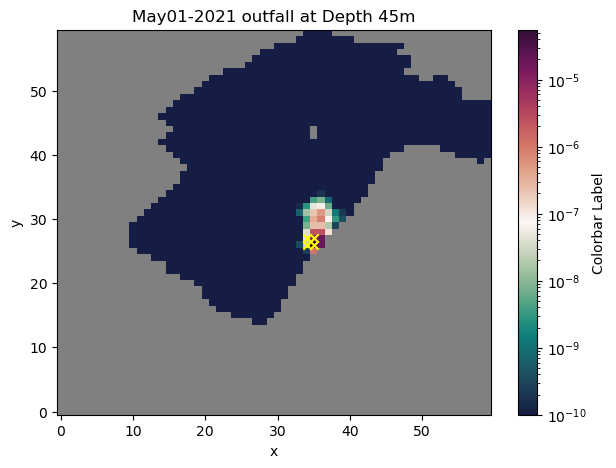

In [11]:
planview(outfall_may_01, 'outfall', 5, 23, cm_vel)

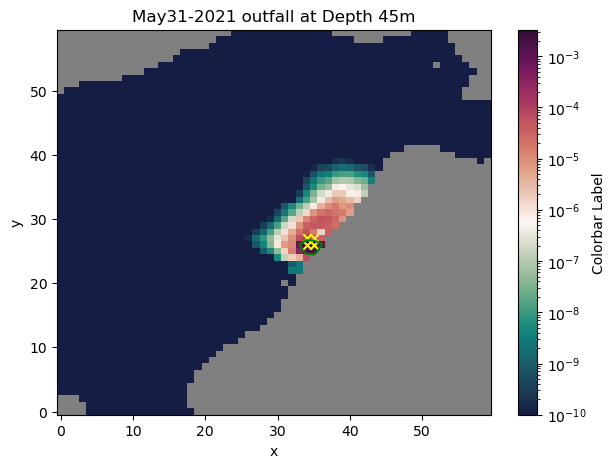

In [6]:
planview(outfall_may_01, 'outfall', 11, 23, cm_vel)

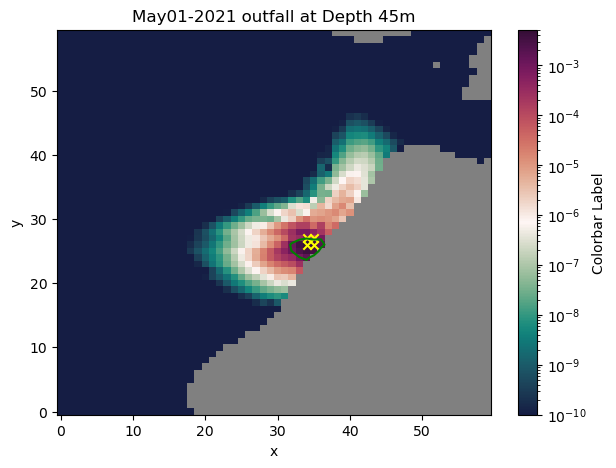

In [12]:
planview(outfall_may_01, 'outfall', 23, 23, cm_vel)

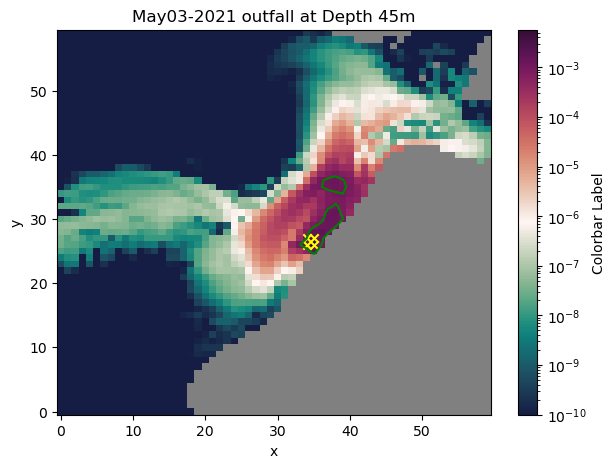

In [14]:
planview(outfall_may_03, 'outfall', 23, 23, cm_vel)

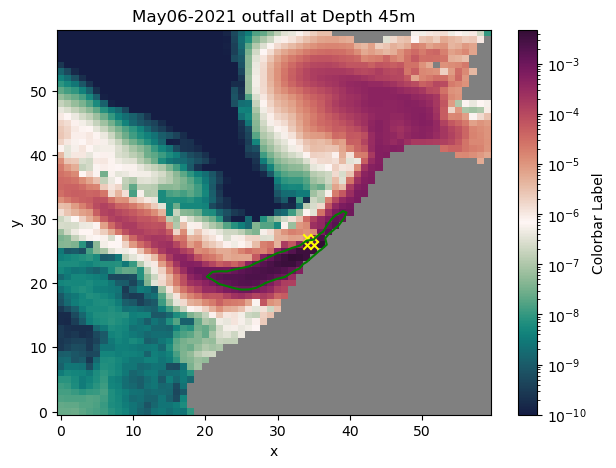

In [19]:
planview(outfall_may_06, 'outfall', 23, 23, cm_vel)

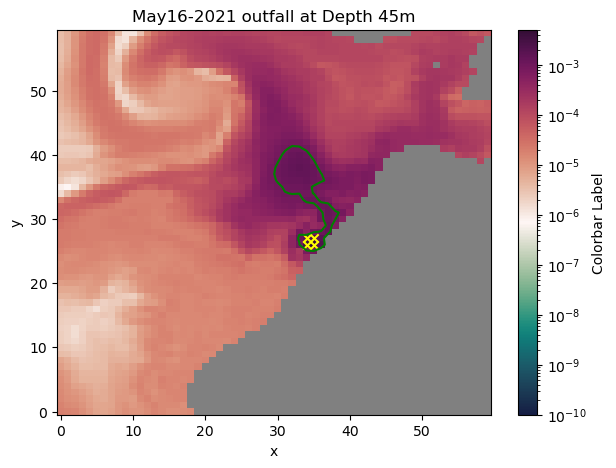

In [21]:
planview(outfall_may_16, 'outfall', 23, 23, cm_vel)

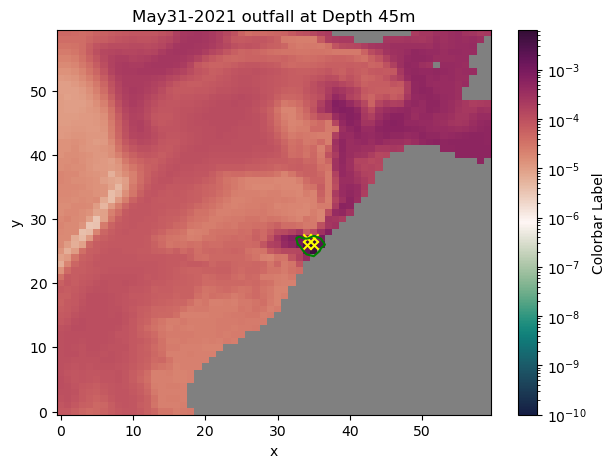

In [23]:
planview(outfall_may_31, 'outfall', 23, 23, cm_vel)

In [36]:
def verticalview(base, field, it, dep, cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, dep, 250+iz:350-iz]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.x, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.x, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis()
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('x')
    axs.set_ylabel('depth')
    axs.set_title(f'May31-2021 {field} at Depth 45m')
    if dep == 446:
        axs.scatter(304 - 270, 98, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 76, marker = 'x', color = 'yellow')
    else: 
        axs.scatter(304 - 270, 121, marker = 'x', color = 'yellow')
        axs.scatter(305 - 270, 98, marker = 'x', color = 'yellow')

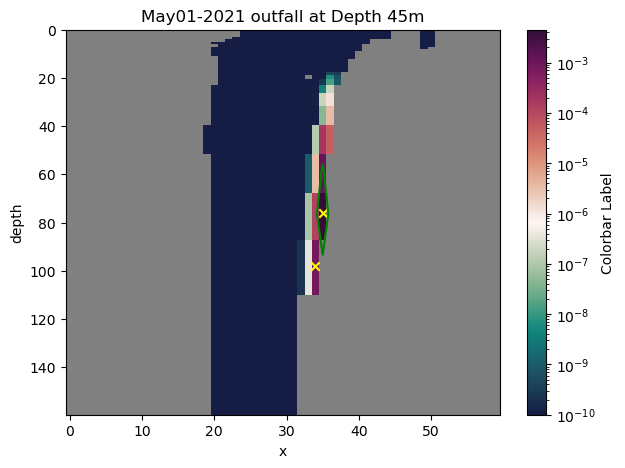

In [25]:
verticalview(outfall_may_01, 'outfall', 2, 446, cm_vel)

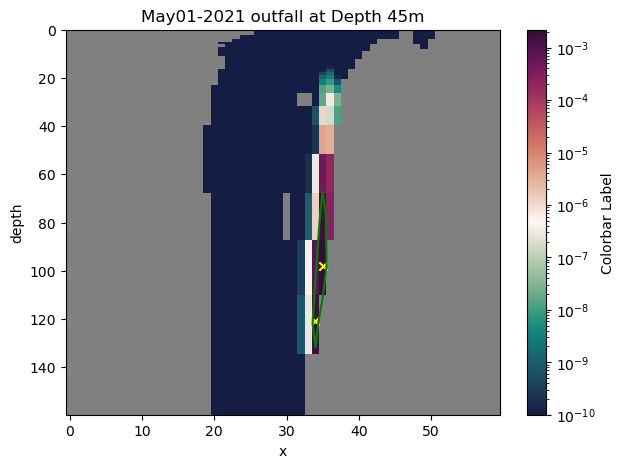

In [26]:
verticalview(outfall_may_01, 'outfall', 5, 446, cm_vel)

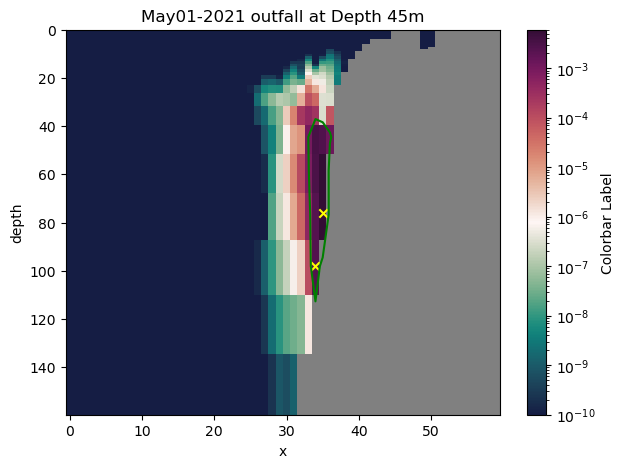

In [27]:
verticalview(outfall_may_01, 'outfall', 11, 446, cm_vel)

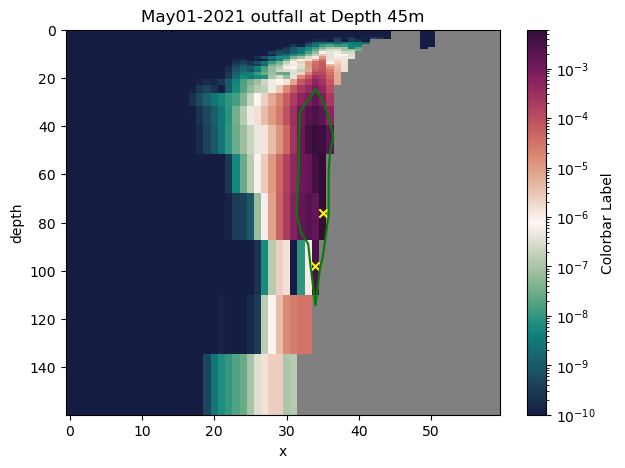

In [29]:
verticalview(outfall_may_01, 'outfall', 23, 446, cm_vel)

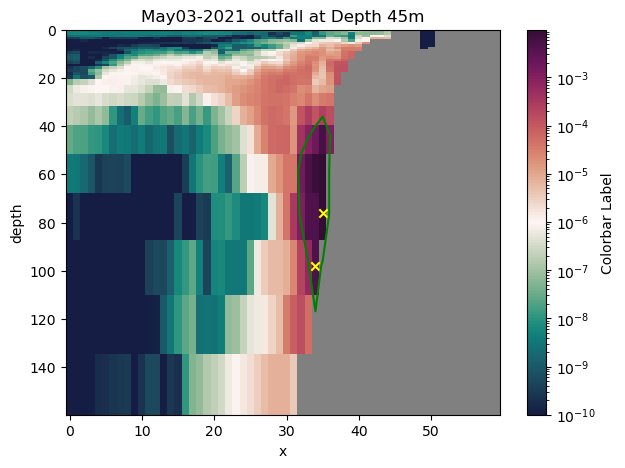

In [31]:
verticalview(outfall_may_03, 'outfall', 23, 446, cm_vel)

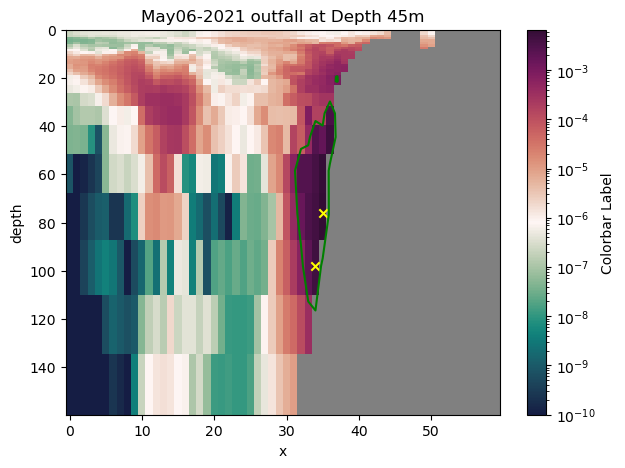

In [33]:
verticalview(outfall_may_06, 'outfall', 23, 446, cm_vel)

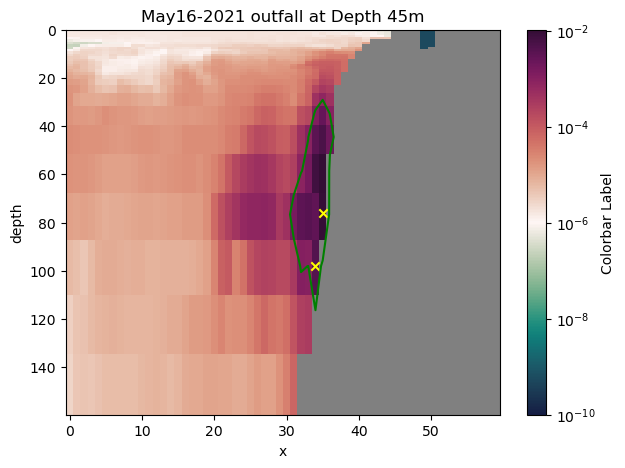

In [35]:
verticalview(outfall_may_16, 'outfall', 23, 446, cm_vel)

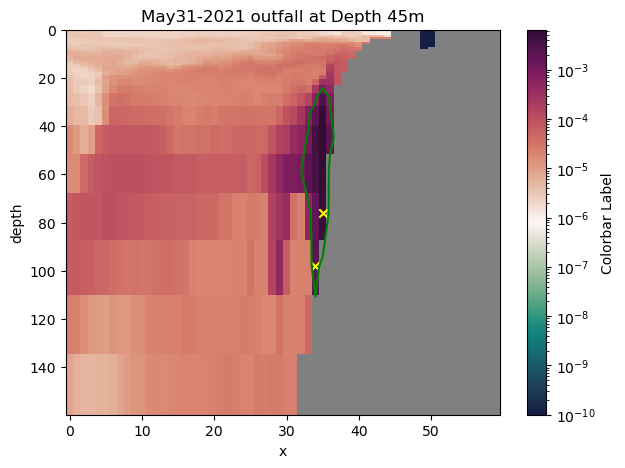

In [37]:
verticalview(outfall_may_31, 'outfall', 23, 446, cm_vel)

In [49]:
def vertical_view_x(base, field, it, dep,  cmap):
    fig, axs = plt.subplots(1, 1, figsize=(7, 5))
    iz = 20  # width of domain plotted
    data = base[field][it, :29, 400+iz:500-iz, dep]
    offset = 1e-10
    contour_value = 1e-3 
    norm_data = colors.LogNorm(vmin=data.values.min() + offset, vmax=data.values.max() + offset)
    pc = axs.pcolormesh(data.y, data.deptht, data.values, cmap=cmap, norm = norm_data, shading='auto')
    # Mask where tmask is False
    pc.set_array(data.values.ravel())  # Set array to the data values
    axs.contour(data.y, data.deptht, data.values, levels=[contour_value], colors='green')
    axs.invert_yaxis() 
    # Add colorbar for reference
    cbar = plt.colorbar(pc, ax=axs, label='Colorbar Label')
    # Set labels and title
    axs.set_xlabel('y')
    axs.set_ylabel('log-depth')
    axs.set_title(f'May31-2021 {field} at Depth 45m')
    if dep == 304:
        axs.scatter(447 - 420, 121, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 98, marker = 'x', color = 'yellow')
    else:
        axs.scatter(447 - 420, 98, marker = 'x', color = 'yellow')
        axs.scatter(446 - 420, 76, marker = 'x', color = 'yellow')

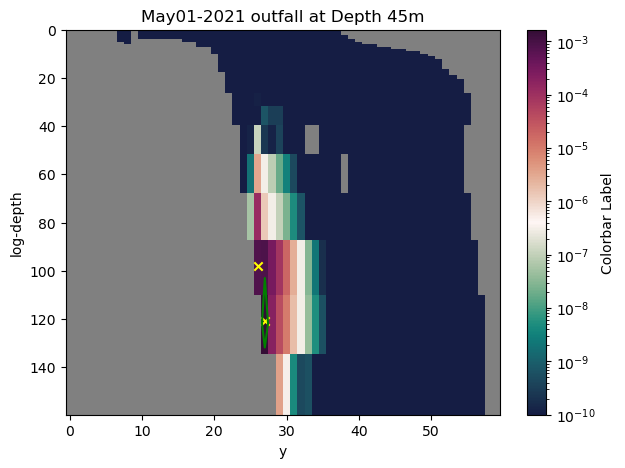

In [39]:
vertical_view_x(outfall_may_01, 'outfall', 2, 304,  cm_vel)

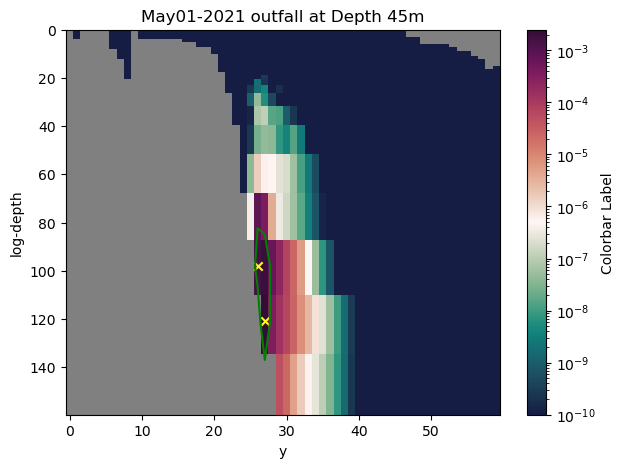

In [40]:
vertical_view_x(outfall_may_01, 'outfall', 5, 304,  cm_vel)

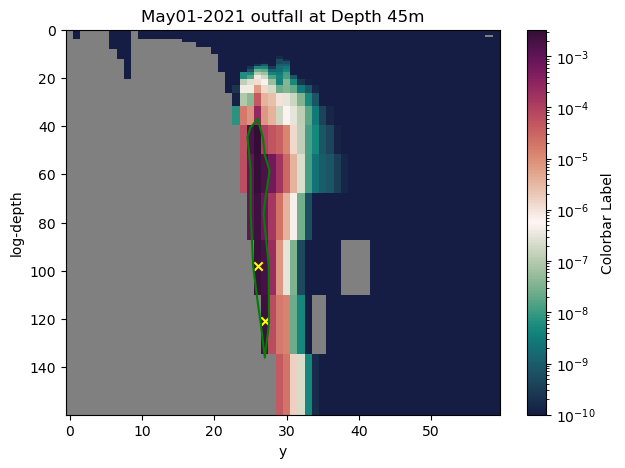

In [41]:
vertical_view_x(outfall_may_01, 'outfall', 11, 304,  cm_vel)

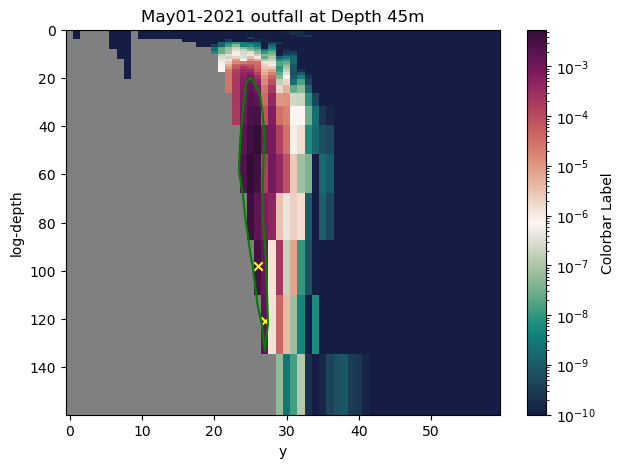

In [42]:
vertical_view_x(outfall_may_01, 'outfall', 23, 304,  cm_vel)

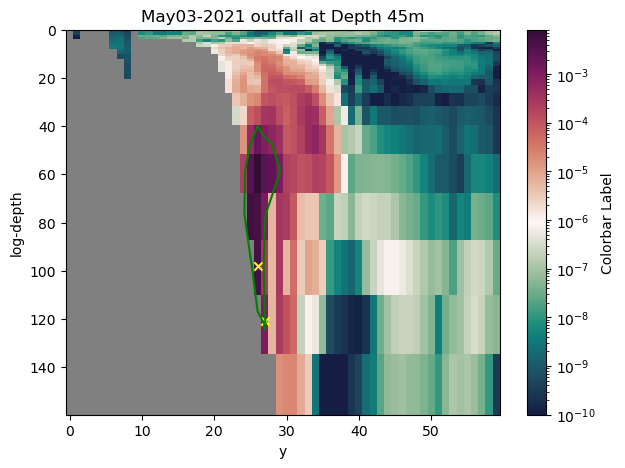

In [44]:
vertical_view_x(outfall_may_03, 'outfall', 23, 304,  cm_vel)

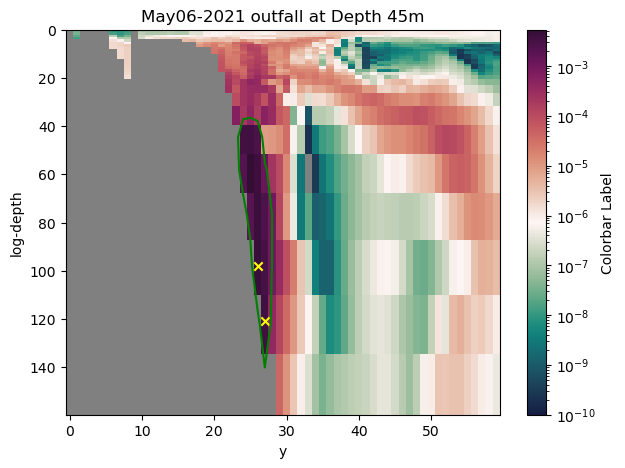

In [46]:
vertical_view_x(outfall_may_06, 'outfall', 23, 304,  cm_vel)

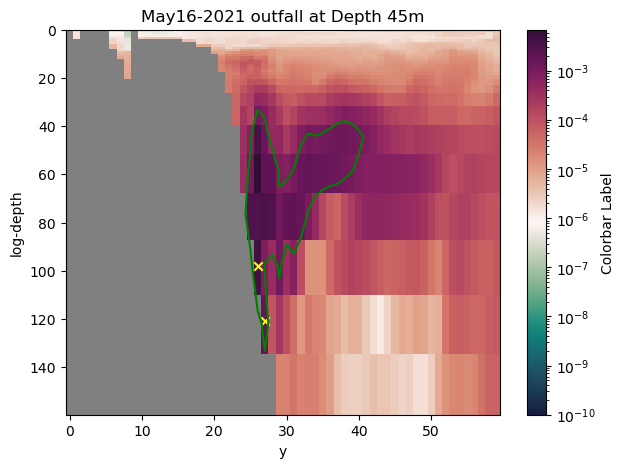

In [48]:
vertical_view_x(outfall_may_16, 'outfall', 23, 304,  cm_vel)

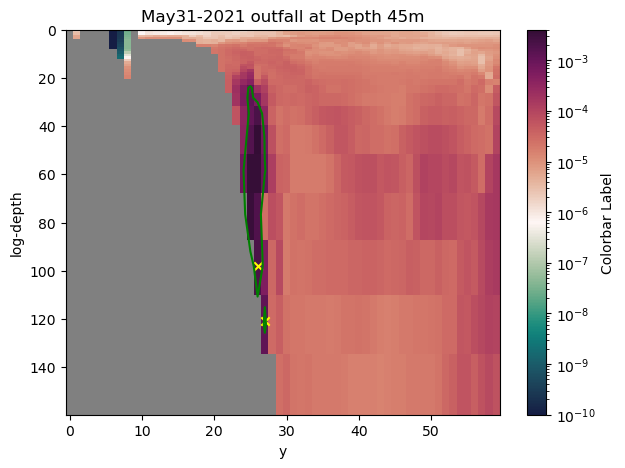

In [50]:
vertical_view_x(outfall_may_31, 'outfall', 23, 304,  cm_vel)